In [1]:
# from platform import python_version

# print(python_version())
# 3.10.9

3.10.9


In [1]:
# Grouped LADs

import fiona
import geopandas as gpd



# Reading in polygon data for councils 
# setting file path
shapefile_path = 'C:/Users/lewil/OneDrive - University of Bristol/Msc Geographic Data Science & Spatial Analytics/Dissertation/Data/LondonOutputAreas/statistical-gis-boundaries-london/ESRI/OA_2011_London_gen_MHW.shp'

# # using fiona to only read in required columns to save memory (column names from metadata)with fiona.open(shapefile_path, 'r') as src:
    selected_schema = {'geometry': src.schema['geometry'], 'properties': {'LAD11NM': 'str', 'LAD11CD': 'str'}}

    # Correctly read only the "geometry", "LAD11NM", and "LAD11CD" columns
    selected_cols = [
        {'properties': {'LAD11NM': feature['properties']['LAD11NM'], 'LAD11CD': feature['properties']['LAD11CD']},
         'geometry': feature['geometry']}
        for feature in src
    ]

# Converting to a GeoDataFrame
LAD_polygons = gpd.GeoDataFrame.from_features(selected_cols, crs=src.crs)

# Checking structure
print(LAD_polygons.head())
LAD_polygons.shape

                                            geometry     LAD11NM    LAD11CD
0  POLYGON ((527635.452 171810.058, 527495.957 17...  Wandsworth  E09000032
1  POLYGON ((543581.516 171132.486, 543704.000 17...     Bromley  E09000006
2  POLYGON ((526613.539 171839.165, 526546.840 17...  Wandsworth  E09000032
3  POLYGON ((533563.521 179695.146, 533351.118 17...   Southwark  E09000028
4  POLYGON ((527822.000 172020.000, 527979.000 17...  Wandsworth  E09000032


(25053, 3)

In [2]:
LAD_polygons.columns

Index(['geometry', 'LAD11NM', 'LAD11CD'], dtype='object')

In [3]:
# making grouped polygons for Local Authority Districts (LADs) instead of Output Areas (OA)

# Grouping geometries in LAD_polygons by 'LAD11CD' and aggregating the 'geometry' column
grouped_polygons = LAD_polygons.groupby('LAD11CD')['geometry'].agg(lambda x: x.unary_union)

# Creating a GeoDataFrame from the grouped polygons
LAD_polygon_df = gpd.GeoDataFrame(geometry=grouped_polygons.values, index=grouped_polygons.index, crs="EPSG:27700")

# Adding 'LAD11NM' column to LAD_polygon_df
LAD_polygon_df['LAD11NM'] = LAD_polygons.groupby('LAD11CD')['LAD11NM'].first().values

# Resetting index to have 'LAD11CD' as a column
#LAD_polygon_df = LAD_polygon_df.reset_index()

# Printing GeoDataFrame
print(LAD_polygon_df.head())
LAD_polygon_df.shape

                                                    geometry  \
LAD11CD                                                        
E09000001  MULTIPOLYGON (((531626.675 180538.983, 531667....   
E09000002  MULTIPOLYGON (((544448.182 183040.246, 544424....   
E09000003  POLYGON ((519605.675 191119.831, 519560.002 19...   
E09000004  MULTIPOLYGON (((544880.245 172189.452, 544619....   
E09000005  POLYGON ((516416.898 185147.598, 516179.054 18...   

                        LAD11NM  
LAD11CD                          
E09000001        City of London  
E09000002  Barking and Dagenham  
E09000003                Barnet  
E09000004                Bexley  
E09000005                 Brent  


(33, 2)

In [6]:
# setting CRS to WGS84
LAD_polygon_df = LAD_polygon_df.to_crs(epsg=4326)

# exporting LAD_polygon_df
LAD_polygon_df.to_file('LAD_polygon_df.shp')

In [7]:
LAD_polygon_df.head()

,geometry,LAD11NM
LAD11CD,,
E09000001,"MULTIPOLYGON (((-0.10473 51.50846, -0.10414 51...",City of London
E09000002,"MULTIPOLYGON (((0.08092 51.52780, 0.08058 51.5...",Barking and Dagenham
E09000003,"POLYGON ((-0.27426 51.60622, -0.27489 51.60693...",Barnet
E09000004,"MULTIPOLYGON (((0.08270 51.43019, 0.07898 51.4...",Bexley
E09000005,"POLYGON ((-0.32226 51.55321, -0.32565 51.55450...",Brent


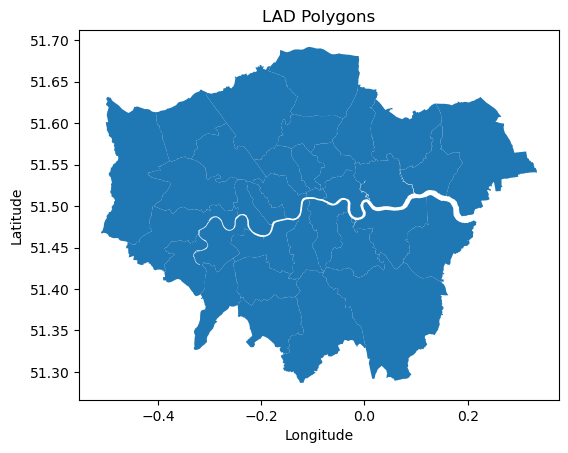

In [5]:
# checking geometries look correct
import matplotlib.pyplot as plt

LAD_polygon_df.plot()

plt.title('LAD Polygons')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()